In [1]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp

In [5]:
@element(num_params=6, units=["Ohm", "Ohm F", "Ohm F","",""],overwrite=True)
def TLMtwoQvary(p,f):
   
    omega = 2 * np.pi * np.array(f)
    R1, R2, R1Q1, R2Q2, delta1, alpha = p[0], p[1], p[2], p[3], p[4], p[5]
    delta2=1-delta1
    k12=R2/R1
    wc1=1/(R1Q1)
    wc2=1/(R2Q2)
    S1=np.sqrt((omega*1j)**alpha/wc1)
    S2=np.sqrt((omega*1j)**alpha/wc2)
    C1=1/np.tanh(delta1*S1)
    C2=1/np.tanh(delta2*S2)

    Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

    return Z

In [18]:
R1=1000
R2=500
Q1=1e-4
Q2=2e-4
delta=0.4
alpha=1

In [19]:
c1=CustomCircuit(initial_guess=[R1,R2,R1*Q1,R2*Q2,delta,alpha],circuit="TLMtwoQvary")

freq=np.logspace(0,3,100)
z1=c1.predict(freq)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


In [27]:
z1_new=z1.tolist()
# print(z1_new)
import json
# imp_data=json.dumps(z1)
# Step 1: Serialize Python Data
json_data = json.dumps({"array": z1_new})

# Step 2: Write to JSON File
with open('data.json', 'w') as json_file:
    json_file.write(json_data)

# Step 3: Read from JSON File (Optional)
with open('data.json', 'r') as json_file:
    loaded_data = json.load(json_file)

# Convert back to NumPy array
loaded_array = np.array(loaded_data["array"])

print(loaded_array) 

TypeError: Object of type complex is not JSON serializable

In [ ]:
c1.fit()

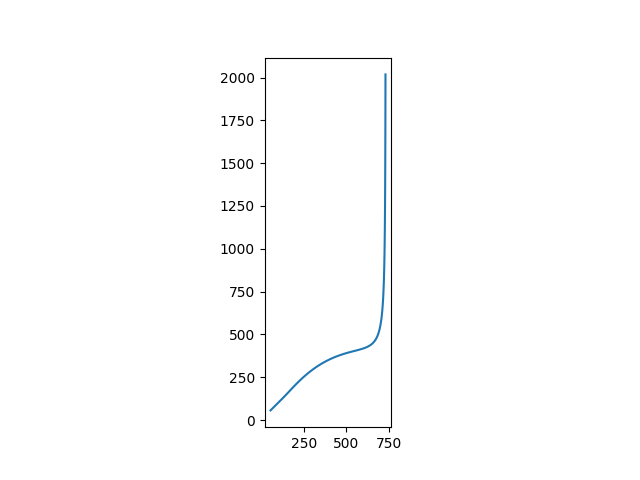

In [20]:
plt.cla()
plt.plot(np.real(z1),-np.imag(z1))
plt.gca().set_aspect("equal")
plt.show()